In [39]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [40]:
# make sure pandas is version 1.0 or higher
# make sure networkx is verion 2.4 or higher
print(pd.__version__)
print(nx.__version__)

2.2.3
3.4.2


In [41]:
from ema_workbench import (
    Model,
    Policy,
    ema_logging,
    SequentialEvaluator,
    MultiprocessingEvaluator,
)
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation2 import get_model_for_problem_formulation, sum_over, sum_over_time

In [42]:
ema_logging.log_to_stderr(ema_logging.INFO)

# choose problem formulation number, between 0-5
# each problem formulation has its own list of outcomes
dike_model, planning_steps = get_model_for_problem_formulation(1)

In [43]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), lower boundary, and upper boundary
import copy

for unc in dike_model.uncertainties:
    print(repr(unc))

uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])
IntegerParameter('A.0_ID flood wave shape', 0, 132, resolution=None, default=None, variable_name=['A.0_ID flood wave shape'], pff=False)
RealParameter('A.1_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.1_Bmax'], pff=False)
RealParameter('A.1_pfail', 0, 1, resolution=None, default=None, variable_name=['A.1_pfail'], pff=False)
CategoricalParameter('A.1_Brate', [0, 1, 2])
RealParameter('A.2_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.2_Bmax'], pff=False)
RealParameter('A.2_pfail', 0, 1, resolution=None, default=None, variable_name=['A.2_pfail'], pff=False)
CategoricalParameter('A.2_Brate', [0, 1, 2])
RealParameter('A.3_Bmax', 30, 350, resolution=None, default=None, variable_name=['A.3_Bmax'], pff=False)
RealParameter('A.3_pfail', 0, 1, resolution=None, default=None, variable_name=['A.3_pfai

In [44]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))

levers = copy.deepcopy(dike_model.levers)

IntegerParameter('0_RfR 0', 0, 1, resolution=None, default=None, variable_name=['0_RfR 0'], pff=False)
IntegerParameter('0_RfR 1', 0, 1, resolution=None, default=None, variable_name=['0_RfR 1'], pff=False)
IntegerParameter('0_RfR 2', 0, 1, resolution=None, default=None, variable_name=['0_RfR 2'], pff=False)
IntegerParameter('1_RfR 0', 0, 1, resolution=None, default=None, variable_name=['1_RfR 0'], pff=False)
IntegerParameter('1_RfR 1', 0, 1, resolution=None, default=None, variable_name=['1_RfR 1'], pff=False)
IntegerParameter('1_RfR 2', 0, 1, resolution=None, default=None, variable_name=['1_RfR 2'], pff=False)
IntegerParameter('2_RfR 0', 0, 1, resolution=None, default=None, variable_name=['2_RfR 0'], pff=False)
IntegerParameter('2_RfR 1', 0, 1, resolution=None, default=None, variable_name=['2_RfR 1'], pff=False)
IntegerParameter('2_RfR 2', 0, 1, resolution=None, default=None, variable_name=['2_RfR 2'], pff=False)
IntegerParameter('3_RfR 0', 0, 1, resolution=None, default=None, variable

In [45]:
# enlisting outcomes
for outcome in dike_model.outcomes:
    print(repr(outcome))

ScalarOutcome('Expected Annual Damage', variable_name=('A.1_Expected Annual Damage', 'A.2_Expected Annual Damage', 'A.3_Expected Annual Damage', 'A.4_Expected Annual Damage', 'A.5_Expected Annual Damage'), function=<function sum_over at 0x1207a3f60>)
ScalarOutcome('Total Investment Costs', variable_name=('A.1_Dike Investment Costs', 'A.2_Dike Investment Costs', 'A.3_Dike Investment Costs', 'A.4_Dike Investment Costs', 'A.5_Dike Investment Costs', 'RfR Total Costs', 'Expected Evacuation Costs'), function=<function sum_over at 0x1207a3f60>)
ScalarOutcome('Expected Number of Deaths', variable_name=('A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths'), function=<function sum_over at 0x1207a3f60>)


In [46]:
# running the model through EMA workbench
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(scenarios=20, policies=275)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 20 scenarios * 275 policies * 1 model(s) = 5500 experiments
100%|████████████████████████████████████| 5500/5500 [1:02:51<00:00,  1.46it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [49]:
# observing the simulation runs
experiments, outcomes = results
print(outcomes.keys())
experiments

dict_keys(['Expected Annual Damage', 'Total Investment Costs', 'Expected Number of Deaths'])


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,107,307.502455,1.0,0.980474,127.753236,1.0,0.932439,149.075285,1.0,0.188273,...,4,9,3,0,1,10,3,570,295,dikesnet
1,122,322.021716,1.0,0.083853,114.403330,10.0,0.745049,204.961335,10.0,0.303741,...,4,9,3,0,1,10,3,571,295,dikesnet
2,22,138.971587,1.0,0.681445,313.107876,1.0,0.585187,227.272475,1.5,0.091808,...,4,9,3,0,1,10,3,572,295,dikesnet
3,3,89.886704,10.0,0.924113,157.125036,10.0,0.151596,74.748393,1.5,0.500606,...,4,9,3,0,1,10,3,573,295,dikesnet
4,89,63.585370,1.5,0.618079,274.593957,1.0,0.247571,336.793184,1.0,0.226656,...,4,9,3,0,1,10,3,574,295,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,53,214.614829,1.0,0.299741,81.232487,1.0,0.278240,298.425896,1.5,0.884471,...,7,6,10,1,2,2,4,585,569,dikesnet
5496,13,186.638945,10.0,0.501499,208.033843,1.5,0.665844,53.856117,1.0,0.755192,...,7,6,10,1,2,2,4,586,569,dikesnet
5497,117,228.920752,1.5,0.300672,228.970263,10.0,0.487285,331.329787,1.0,0.675523,...,7,6,10,1,2,2,4,587,569,dikesnet
5498,69,204.952371,1.0,0.026815,48.536299,1.5,0.544803,136.654759,10.0,0.591265,...,7,6,10,1,2,2,4,588,569,dikesnet


In [50]:
experiments.columns

Index(['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail',
       'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate',
       'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax',
       'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1',
       'discount rate 2', '0_RfR 0', '0_RfR 1', '0_RfR 2', '1_RfR 0',
       '1_RfR 1', '1_RfR 2', '2_RfR 0', '2_RfR 1', '2_RfR 2', '3_RfR 0',
       '3_RfR 1', '3_RfR 2', '4_RfR 0', '4_RfR 1', '4_RfR 2',
       'A.1_DikeIncrease 0', 'A.1_DikeIncrease 1', 'A.1_DikeIncrease 2',
       'A.2_DikeIncrease 0', 'A.2_DikeIncrease 1', 'A.2_DikeIncrease 2',
       'A.3_DikeIncrease 0', 'A.3_DikeIncrease 1', 'A.3_DikeIncrease 2',
       'A.4_DikeIncrease 0', 'A.4_DikeIncrease 1', 'A.4_DikeIncrease 2',
       'A.5_DikeIncrease 0', 'A.5_DikeIncrease 1', 'A.5_DikeIncrease 2',
       'EWS_DaysToThreat', 'scenario', 'policy', 'model'],
      dtype='object')

In [51]:
# only works because we have scalar outcomes
outcomes_pd = pd.DataFrame(outcomes)
outcomes_pd

,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
0,1.409956e+05,2.040597e+09,0.000008
1,9.145332e+06,2.040597e+09,0.000770
2,1.310608e+07,2.040598e+09,0.002771
3,4.100918e+07,2.040601e+09,0.006625
4,3.636032e+08,2.040616e+09,0.027887
...,...,...,...
5495,9.751236e+07,1.390798e+09,0.014181
5496,1.683245e+06,1.390788e+09,0.000277
5497,1.453701e+08,1.390801e+09,0.019051
5498,1.735227e+07,1.390789e+09,0.001897


In [52]:
tot = experiments.join(outcomes_pd)
tot


,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
0,107,307.502455,1.0,0.980474,127.753236,1.0,0.932439,149.075285,1.0,0.188273,...,0,1,10,3,570,295,dikesnet,1.409956e+05,2.040597e+09,0.000008
1,122,322.021716,1.0,0.083853,114.403330,10.0,0.745049,204.961335,10.0,0.303741,...,0,1,10,3,571,295,dikesnet,9.145332e+06,2.040597e+09,0.000770
2,22,138.971587,1.0,0.681445,313.107876,1.0,0.585187,227.272475,1.5,0.091808,...,0,1,10,3,572,295,dikesnet,1.310608e+07,2.040598e+09,0.002771
3,3,89.886704,10.0,0.924113,157.125036,10.0,0.151596,74.748393,1.5,0.500606,...,0,1,10,3,573,295,dikesnet,4.100918e+07,2.040601e+09,0.006625
4,89,63.585370,1.5,0.618079,274.593957,1.0,0.247571,336.793184,1.0,0.226656,...,0,1,10,3,574,295,dikesnet,3.636032e+08,2.040616e+09,0.027887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495,53,214.614829,1.0,0.299741,81.232487,1.0,0.278240,298.425896,1.5,0.884471,...,1,2,2,4,585,569,dikesnet,9.751236e+07,1.390798e+09,0.014181
5496,13,186.638945,10.0,0.501499,208.033843,1.5,0.665844,53.856117,1.0,0.755192,...,1,2,2,4,586,569,dikesnet,1.683245e+06,1.390788e+09,0.000277
5497,117,228.920752,1.5,0.300672,228.970263,10.0,0.487285,331.329787,1.0,0.675523,...,1,2,2,4,587,569,dikesnet,1.453701e+08,1.390801e+09,0.019051
5498,69,204.952371,1.0,0.026815,48.536299,1.5,0.544803,136.654759,10.0,0.591265,...,1,2,2,4,588,569,dikesnet,1.735227e+07,1.390789e+09,0.001897


[MainProcess/INFO] no time dimension found in results


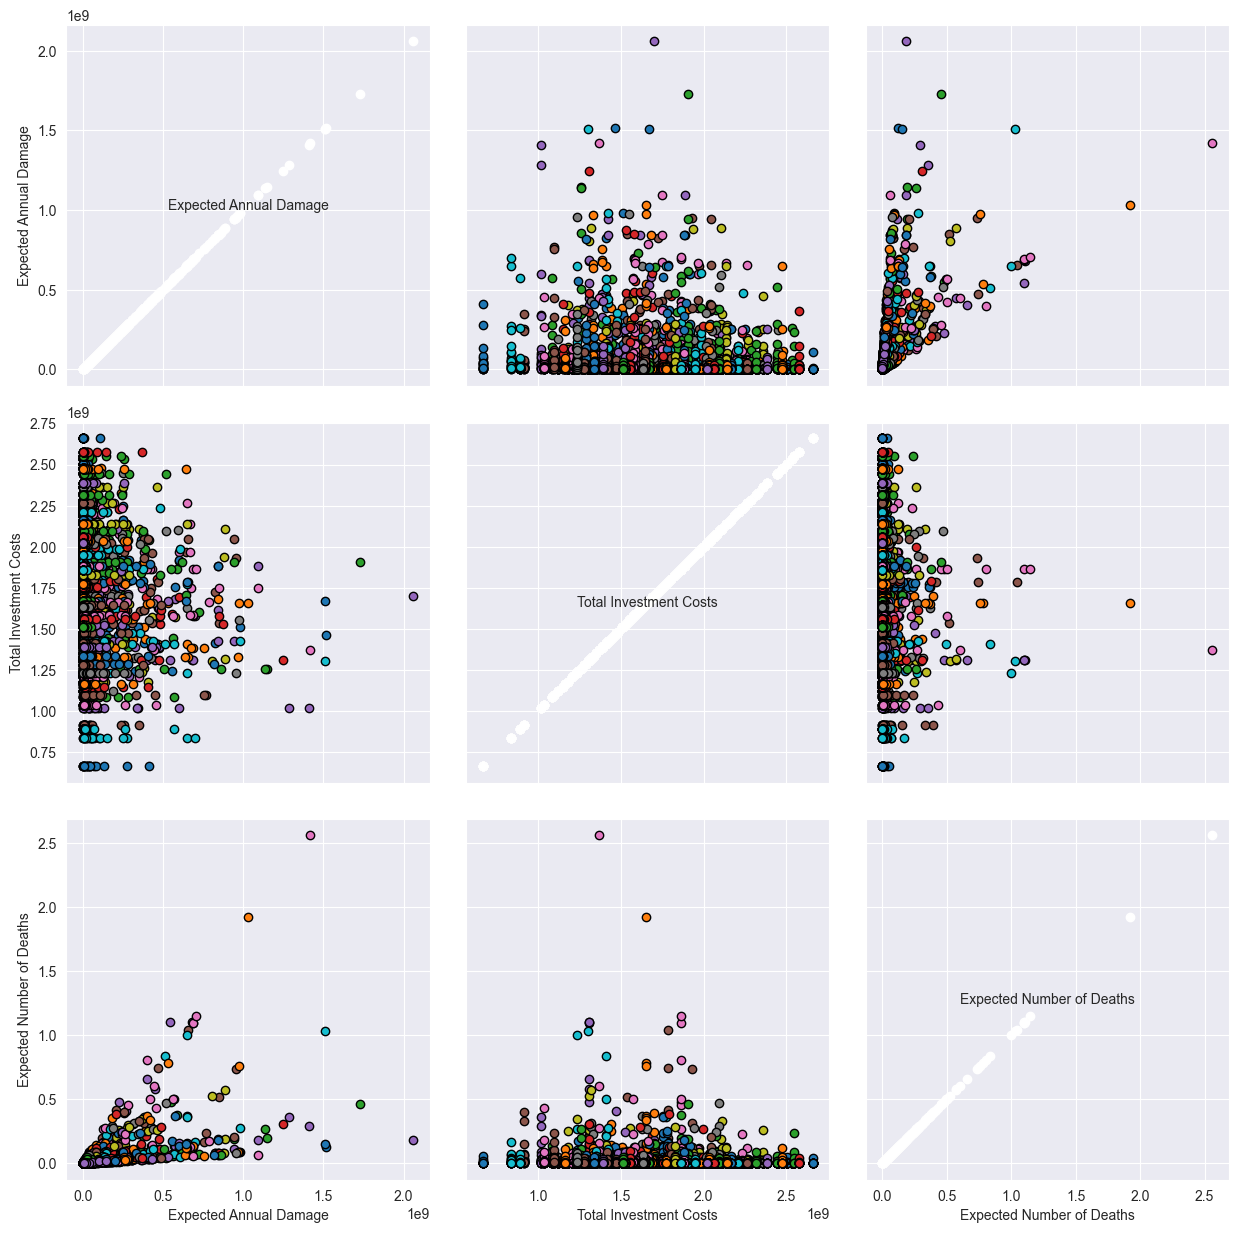

In [53]:
from ema_workbench.analysis import pairs_plotting

fig, axes = pairs_plotting.pairs_scatter(tot, outcomes, group_by='policy',legend=False)
fig.set_figheight(15)
fig.set_figwidth(15)
plt.show()

In [54]:
tot_policy = tot.groupby('policy').mean(numeric_only=True)
tot_policy.sort_values(by=tot_policy.columns[-1], ascending=True, inplace=True)
tot_policy

/var/folders/qb/b4rbb8y50xx3j5vvd_6hpwdr0000gn/T/ipykernel_20626/255886294.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tot_policy = tot.groupby('policy').mean(numeric_only=True)


,A.0_ID flood wave shape,A.1_Bmax,A.1_pfail,A.2_Bmax,A.2_pfail,A.3_Bmax,A.3_pfail,A.4_Bmax,A.4_pfail,A.5_Bmax,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,Expected Annual Damage,Total Investment Costs,Expected Number of Deaths
policy,,,,,,,,,,,,,,,,,,,,,
489,66.0,191.098177,0.498669,189.937948,0.496018,190.736658,0.50141,188.904664,0.505014,188.454041,...,10.0,0.0,6.0,10.0,1.0,5.0,4.0,4.591949e+04,1.860270e+09,0.000006
302,66.0,191.098177,0.498669,189.937948,0.496018,190.736658,0.50141,188.904664,0.505014,188.454041,...,9.0,2.0,9.0,5.0,10.0,8.0,4.0,9.053920e+05,2.186599e+09,0.000101
516,66.0,191.098177,0.498669,189.937948,0.496018,190.736658,0.50141,188.904664,0.505014,188.454041,...,3.0,5.0,4.0,7.0,0.0,7.0,3.0,1.186202e+06,1.976193e+09,0.000103
400,66.0,191.098177,0.498669,189.937948,0.496018,190.736658,0.50141,188.904664,0.505014,188.454041,...,4.0,2.0,6.0,9.0,2.0,0.0,4.0,1.741049e+06,1.685995e+09,0.000135
342,66.0,191.098177,0.498669,189.937948,0.496018,190.736658,0.50141,188.904664,0.505014,188.454041,...,6.0,7.0,4.0,9.0,1.0,0.0,1.0,4.640253e+05,2.032176e+09,0.000169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,66.0,191.098177,0.498669,189.937948,0.496018,190.736658,0.50141,188.904664,0.505014,188.454041,...,4.0,3.0,8.0,6.0,3.0,1.0,0.0,1.004147e+08,1.783809e+09,0.157729
471,66.0,191.098177,0.498669,189.937948,0.496018,190.736658,0.50141,188.904664,0.505014,188.454041,...,10.0,8.0,1.0,9.0,8.0,8.0,0.0,1.249542e+08,1.370876e+09,0.208755
476,66.0,191.098177,0.498669,189.937948,0.496018,190.736658,0.50141,188.904664,0.505014,188.454041,...,7.0,6.0,2.0,7.0,8.0,9.0,0.0,1.954416e+08,1.655450e+09,0.256461


In [56]:
# code blok mean/max/min
# Zet de outcomes om naar een dataframe
outcomes_df = pd.DataFrame.from_dict(outcomes)

# Selecteer de juiste kolommen (kosten en schade)
columns = ["RfR Total Costs", "Expected Annual Damage"]

# Bereken mean, max, min
summary = outcomes_df[columns].agg(['mean', 'max', 'min'])

# Zet kosten om naar miljoenen euro (zoals in voorbeeldtabel)
summary.loc[:, "RfR Total Costs"] = summary["RfR Total Costs"] / 1e6
summary.loc[:, "Expected Annual Damage"] = summary["Expected Annual Damage"] / 1e6

# Rond af op 2 decimalen
summary = summary.round(2)

# Herbenoem de rijen voor helderheid
summary.index = ['Mean', 'Maximum', 'Minimum']
summary

KeyError: "['RfR Total Costs'] not in index"

In [55]:
# defining specific policies
# for example, policy 1 is about extra protection in upper boundary
# policy 2 is about extra protection in lower boundary
# policy 3 is extra protection in random locations


def get_do_nothing_dict():
    return {l.name: 0 for l in dike_model.levers}


policies = [
    Policy(
        "policy 1",
        **dict(
            get_do_nothing_dict(),
            **{"0_RfR 0": 1, "0_RfR 1": 1, "0_RfR 2": 1, "A.1_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 2",
        **dict(
            get_do_nothing_dict(),
            **{"4_RfR 0": 1, "4_RfR 1": 1, "4_RfR 2": 1, "A.5_DikeIncrease 0": 5}
        )
    ),
    Policy(
        "policy 3",
        **dict(
            get_do_nothing_dict(),
            **{"1_RfR 0": 1, "2_RfR 1": 1, "3_RfR 2": 1, "A.3_DikeIncrease 0": 5}
        )
    ),
]

In [15]:
# pass the policies list to EMA workbench experiment runs
n_scenarios = 100
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.perform_experiments(n_scenarios, policies)

[MainProcess/INFO] pool started with 8 workers
[MainProcess/INFO] performing 100 scenarios * 3 policies * 1 model(s) = 300 experiments
100%|████████████████████████████████████████| 300/300 [00:19<00:00, 15.32it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


In [16]:
experiments, outcomes = results

In [17]:
# only works because we have scalar outcomes
pd.DataFrame(outcomes)

,Expected Annual Damage,RfR Total Costs
0,2.148542e+09,253800000.0
1,1.002035e+09,253800000.0
2,4.563797e+08,253800000.0
3,4.564004e+08,253800000.0
4,3.353403e+08,253800000.0
...,...,...
295,1.366624e+08,369700000.0
296,3.351471e+08,369700000.0
297,2.306869e+07,369700000.0
298,8.200146e+08,369700000.0


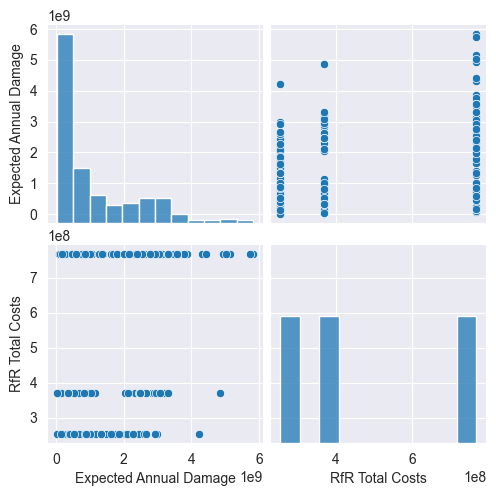

In [18]:
sns.pairplot(pd.DataFrame.from_dict(outcomes))
plt.show()

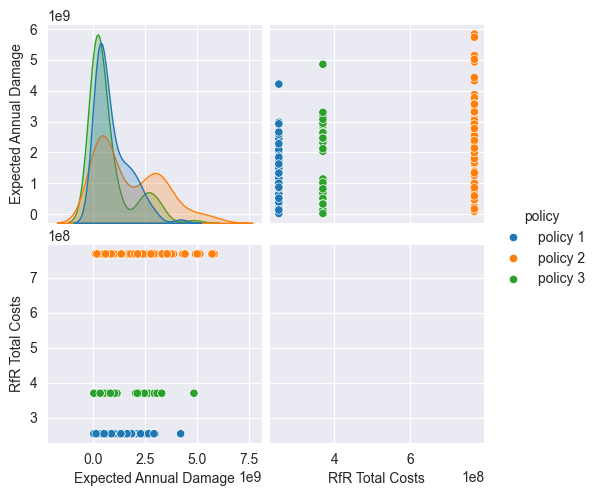

In [19]:
policies = experiments['policy']

data = pd.DataFrame.from_dict(outcomes)
data['policy'] = policies

sns.pairplot(data, hue='policy',  vars=outcomes.keys(), )
plt.show()